In [221]:
import pandas as pd
import numpy as np
dfTesting = pd.read_csv("users_with_1-2_objects/validTestingResults.csv", sep=";", header=0, index_col=None)
dfTesting.head()

,id,userID,objectID,visited_objects,eventType,eventValue,position,date
0,38,2673313,387,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26
1,39,2673313,4911,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26
2,40,2673313,4788,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26
3,41,2673313,6219,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26
4,42,2673313,1687,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26


In [222]:
dfIF = pd.read_csv("recent_implicit_feedback.csv", sep=";", header=0, index_col=None)
dfIF.head()

,id,userID,objectID,eventType,eventValue,lastModified
0,3706361,2705429,263,pageview,1,2018-07-16 00:04:42
1,3706364,2705430,5734,pageview,1,2018-07-16 00:07:05
2,3706366,2705431,324,pageview,1,2018-07-16 00:11:04
3,3706369,2705431,108,pageview,1,2018-07-16 00:11:48
4,3706372,2705433,303,pageview,1,2018-07-16 01:03:41


In [223]:
resOO = pd.read_csv("users_with_1-2_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO.head()

,cnt
recVariant,
0,47
1,51
2,48
3,41
4,41


In [224]:
sum(resOO.cnt)

562

In [225]:
resSO = pd.read_csv("users_with_1-2_objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO.head()

,cnt
recVariant,
0,6079
1,5577
2,5660
3,6439
4,5339


In [226]:
sum(resSO.cnt)

67573

In [227]:
resOO["ctr"] = resOO.cnt / resSO.cnt

In [228]:
merged = pd.merge(dfTesting, dfIF, how='inner', on=("userID", "objectID"))
merged.head()

,id_x,userID,objectID,visited_objects,eventType_x,eventValue_x,position,date,id_y,eventType_y,eventValue_y,lastModified
0,38,2673313,387,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26,3712651,pageview,1,2018-07-20 13:06:34
1,100599,2673313,387,2,object_shown_in_list,1,recomended,2018-07-31 09:00:24,3712651,pageview,1,2018-07-20 13:06:34
2,100611,2673313,387,2,object_shown_in_list,1,recomended,2018-07-31 09:00:28,3712651,pageview,1,2018-07-20 13:06:34
3,100618,2673313,387,2,object_shown_in_list,1,recomended,2018-07-31 09:00:33,3712651,pageview,1,2018-07-20 13:06:34
4,39,2673313,4911,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26,3664714,pageview,7,2018-07-31 09:00:34


In [229]:
import datetime
merged["dateX"] = pd.to_datetime(merged.date)
merged["lastModifiedX"] = pd.to_datetime(merged.lastModified)
merged["dtDiff"] = (merged["lastModifiedX"] - merged["dateX"]).dt.seconds
merged.head()

,id_x,userID,objectID,visited_objects,eventType_x,eventValue_x,position,date,id_y,eventType_y,eventValue_y,lastModified,dateX,lastModifiedX,dtDiff
0,38,2673313,387,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26,3712651,pageview,1,2018-07-20 13:06:34,2018-07-20 17:21:26,2018-07-20 13:06:34,71108
1,100599,2673313,387,2,object_shown_in_list,1,recomended,2018-07-31 09:00:24,3712651,pageview,1,2018-07-20 13:06:34,2018-07-31 09:00:24,2018-07-20 13:06:34,14770
2,100611,2673313,387,2,object_shown_in_list,1,recomended,2018-07-31 09:00:28,3712651,pageview,1,2018-07-20 13:06:34,2018-07-31 09:00:28,2018-07-20 13:06:34,14766
3,100618,2673313,387,2,object_shown_in_list,1,recomended,2018-07-31 09:00:33,3712651,pageview,1,2018-07-20 13:06:34,2018-07-31 09:00:33,2018-07-20 13:06:34,14761
4,39,2673313,4911,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26,3664714,pageview,7,2018-07-31 09:00:34,2018-07-20 17:21:26,2018-07-31 09:00:34,56348


In [230]:
mergedRestr = merged.loc[(merged.date < merged.lastModified) & (merged.dtDiff > 5) & (merged.eventType_x == "object_shown_in_list") & (merged.visited_objects > 0) & (merged.eventType_y == "pageview")]
mergedRestr.head()

,id_x,userID,objectID,visited_objects,eventType_x,eventValue_x,position,date,id_y,eventType_y,eventValue_y,lastModified,dateX,lastModifiedX,dtDiff
4,39,2673313,4911,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26,3664714,pageview,7,2018-07-31 09:00:34,2018-07-20 17:21:26,2018-07-31 09:00:34,56348
5,100600,2673313,4911,2,object_shown_in_list,1,recomended,2018-07-31 09:00:24,3664714,pageview,7,2018-07-31 09:00:34,2018-07-31 09:00:24,2018-07-31 09:00:34,10
6,100612,2673313,4911,2,object_shown_in_list,1,recomended,2018-07-31 09:00:28,3664714,pageview,7,2018-07-31 09:00:34,2018-07-31 09:00:28,2018-07-31 09:00:34,6
9,104,2709558,352,1,object_shown_in_list,1,recomended,2018-07-20 17:37:39,3712985,pageview,3,2018-07-20 17:48:12,2018-07-20 17:37:39,2018-07-20 17:48:12,633
11,117,2709558,352,1,object_shown_in_list,1,recomended,2018-07-20 17:40:32,3712985,pageview,3,2018-07-20 17:48:12,2018-07-20 17:40:32,2018-07-20 17:48:12,460


In [231]:
mergedRestr.shape

(3869, 15)

In [232]:
(merged.shape, mergedRestr.shape)

((10309, 15), (3869, 15))

In [233]:
#deviation from original results: attribute only closest recommendation
#mergedRestr.sort_values("dtDiff", inplace=True)
#mergedRestr.drop_duplicates(["userID", "objectID", "lastModified"], inplace=True)
#mergedRestr.head()

In [234]:
mergedRestr.shape

(3869, 15)

In [235]:
mergedRestr["recVariant"] = mergedRestr.userID % 12
mergedRestr = mergedRestr[["recVariant","date","lastModified"]]
mergedRestr.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,recVariant,date,lastModified
4,1,2018-07-20 17:21:26,2018-07-31 09:00:34
5,1,2018-07-31 09:00:24,2018-07-31 09:00:34
6,1,2018-07-31 09:00:28,2018-07-31 09:00:34
9,6,2018-07-20 17:37:39,2018-07-20 17:48:12
11,6,2018-07-20 17:40:32,2018-07-20 17:48:12


In [236]:
dfGroup = mergedRestr.groupby(by=["recVariant"])
dfSum = dfGroup.count()
dfSum

,date,lastModified
recVariant,,
0,289,289
1,372,372
2,290,290
3,338,338
4,265,265
5,125,125
6,520,520
7,286,286
8,306,306


In [237]:
resOO["vrr"] = dfSum.date/resSO.cnt

In [238]:
algVariants = [{"name":"doc2vec", "params": "128,1", "aggregation": "last", "diversity": "no", "novelty": "yes"},
            {"name":"doc2vec", "params": "128,1", "aggregation": "temporal", "diversity": "yes", "novelty": "no"},
            {"name":"doc2vec", "params": "32,5", "aggregation": "mean", "diversity": "no", "novelty": "no"},
            {"name":"doc2vec", "params": "32,5", "aggregation": "mean", "diversity": "yes", "novelty": "no"},
            {"name":"doc2vec", "params": "128,5", "aggregation": "max", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "noSameObjects", "aggregation": "temporal", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "sameAllowed", "aggregation": "mean", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "sameAllowed", "aggregation": "window10", "diversity": "no", "novelty": "no"},
            {"name":"word2vec", "params": "64,5", "aggregation": "mean", "diversity": "yes", "novelty": "no"},
            {"name":"word2vec", "params": "32,5", "aggregation": "temporal", "diversity": "no", "novelty": "yes"},
            {"name":"word2vec", "params": "128,3", "aggregation": "last", "diversity": "no", "novelty": "no"},
            {"name":"word2vec", "params": "32,3", "aggregation": "window10", "diversity": "no", "novelty": "no"}]
#resOO["algorithm"] = algVariants
#resOO

In [239]:
np.corrcoef(resOO.ctr, resOO.vrr)

array([[1.       , 0.7544221],
       [0.7544221, 1.       ]])

In [240]:
from scipy.stats import spearmanr
spearmanr(resOO.ctr, resOO.vrr)

SpearmanrResult(correlation=0.6713286713286714, pvalue=0.016831456186893395)

[Text(0, 0.5, 'R^2'),
 Text(0, 1.5, '-mae'),
 Text(0, 2.5, 'map'),
 Text(0, 3.5, 'auc'),
 Text(0, 4.5, 'mrr'),
 Text(0, 5.5, 'p5'),
 Text(0, 6.5, 'p10'),
 Text(0, 7.5, 'r5'),
 Text(0, 8.5, 'r10'),
 Text(0, 9.5, 'nDCG10'),
 Text(0, 10.5, 'nDCG100'),
 Text(0, 11.5, 'nDCG'),
 Text(0, 12.5, 'novelty5_t'),
 Text(0, 13.5, 'novelty10_t'),
 Text(0, 14.5, 'novelty5_u'),
 Text(0, 15.5, 'novelty10_u'),
 Text(0, 16.5, 'ild5'),
 Text(0, 17.5, 'ild10')]

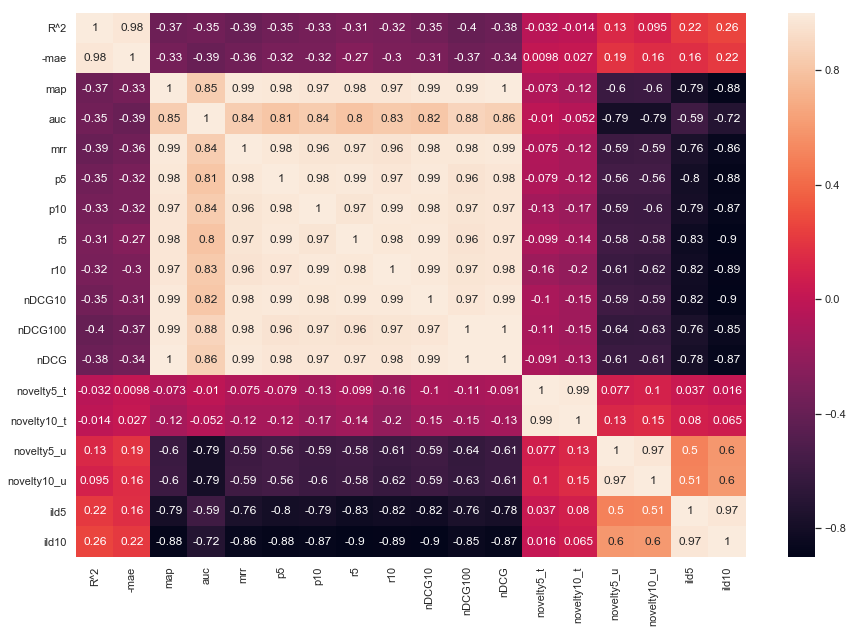

In [241]:
#get data from off-line evaluation
df = pd.read_csv("../../resultsWithNovDiv_32_0dot01Temporal.csv", sep=";", header=0, index_col=None)
df.user_novelty5 = 1-df.user_novelty5
df.user_novelty10 = 1-df.user_novelty10
df.mae = -df.mae
df.rename(columns={"r2Score":"R^2", "mae":"-mae", "aucScore":"auc", "nDCGFull":"nDCG", "novelty5":"novelty5_t", "novelty10":"novelty10_t", "user_novelty5":"novelty5_u", "user_novelty10":"novelty10_u"}, inplace=True)
del df["uid"]

%matplotlib inline
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(dfMean.corr(method='spearman'), annot=True)
ax.set_xticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_xticklabels(dfMean.columns)

ax.set_yticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_yticklabels(dfMean.columns)
#df = df[["alg","params","recAlg","noveltyEnhance","diversityEnhance","-mae", "auc", "mrr", "nDCG100","novelty10_t","novelty10_u","ild10"]]

In [242]:
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
dfMean.reset_index(inplace=True)
dfMean.head()


,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,r10,nDCG10,nDCG100,nDCG,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10
0,attributeCosineSim,noSameObjects,last,no,no,-91.822720,-0.374933,0.098746,0.736751,0.134829,...,0.165285,0.117739,0.191740,0.267841,0.215980,0.216582,0.996842,0.998246,0.159069,0.213208
1,attributeCosineSim,noSameObjects,last,no,yes,-91.822720,-0.374933,0.100078,0.736751,0.135444,...,0.175693,0.123025,0.193977,0.270085,0.216626,0.217033,0.997544,0.998246,0.199657,0.240683
2,attributeCosineSim,noSameObjects,last,yes,no,-91.857046,-0.375671,0.095557,0.738166,0.131909,...,0.158286,0.113435,0.189104,0.265332,0.223728,0.222839,0.997895,0.998772,0.160148,0.213817
3,attributeCosineSim,noSameObjects,last,yes,yes,-91.857046,-0.375671,0.097457,0.738166,0.133143,...,0.169165,0.119575,0.191978,0.268207,0.224606,0.223193,0.997544,0.998246,0.200647,0.241725
4,attributeCosineSim,noSameObjects,max,no,no,-108.736169,-0.422967,0.102429,0.795054,0.139913,...,0.172905,0.119845,0.214346,0.277381,0.220921,0.220340,0.991228,0.992456,0.234894,0.272226


In [243]:
selectedRes = map(lambda x: dfMean.loc[(dfMean.alg == x["name"]) & (dfMean.params == x["params"]) & (dfMean.recAlg == x["aggregation"]) & (dfMean.noveltyEnhance == x["novelty"])  & (dfMean.diversityEnhance == x["diversity"])  ], algVariants )
#selectedRes = map(lambda x: df.loc[(df.alg == x["name"]) ], algVariants )

In [244]:
lst = list(selectedRes)
lst

[        alg params recAlg noveltyEnhance diversityEnhance        R^2  \
 82  doc2vec  128,1   last            yes               no -56.500787   
 
         -mae       map       auc       mrr    ...          r10    nDCG10  \
 82 -0.292326  0.019512  0.617363  0.030878    ...     0.032393  0.019155   
 
      nDCG100      nDCG  novelty5_t  novelty10_t  novelty5_u  novelty10_u  \
 82  0.056917  0.170651    0.233618     0.233531         1.0          1.0   
 
         ild5     ild10  
 82  0.785023  0.799611  
 
 [1 rows x 23 columns],
         alg params    recAlg noveltyEnhance diversityEnhance        R^2  \
 93  doc2vec  128,1  temporal             no              yes -76.254187   
 
         -mae       map       auc       mrr    ...          r10    nDCG10  \
 93 -0.361817  0.022211  0.678597  0.031335    ...     0.022517  0.012119   
 
      nDCG100      nDCG  novelty5_t  novelty10_t  novelty5_u  novelty10_u  \
 93  0.075085  0.176429    0.219208     0.220975    0.997548     0.996848  

In [245]:
dct = dict([(i, lst[i].iloc[0,:].to_dict()) for i in range(len(lst))])

In [246]:
dfx = pd.DataFrame.from_dict(dct, orient='index')
dfx.index.name = 'recVariant'
dfx.index.name 

'recVariant'

In [247]:
#dfx.merge(resOO, on="recVariant")
results = pd.concat([dfx, resOO], axis=1)

In [248]:
del results["cnt"]
results

,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,nDCG100,nDCG,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10,ctr,vrr
recVariant,,,,,,,,,,,,,,,,,,,,,
0,doc2vec,"128,1",last,yes,no,-56.500787,-0.292326,0.019512,0.617363,0.030878,...,0.056917,0.170651,0.233618,0.233531,1.000000,1.000000,0.785023,0.799611,0.007732,0.047541
1,doc2vec,"128,1",temporal,no,yes,-76.254187,-0.361817,0.022211,0.678597,0.031335,...,0.075085,0.176429,0.219208,0.220975,0.997548,0.996848,0.866049,0.838122,0.009145,0.066703
2,doc2vec,"32,5",mean,no,no,-114.389802,-0.455116,0.016662,0.554607,0.028117,...,0.049527,0.164425,0.211227,0.211395,0.997198,0.997373,0.762579,0.785867,0.008481,0.051237
3,doc2vec,"32,5",mean,no,yes,-114.389802,-0.455116,0.015012,0.554607,0.025444,...,0.046461,0.161362,0.213367,0.214064,0.996848,0.997723,0.905701,0.859131,0.006367,0.052493
4,doc2vec,"128,5",max,yes,no,-35.840726,-0.213676,0.010498,0.525550,0.012323,...,0.031365,0.151906,0.233073,0.228605,0.995447,0.994571,0.682880,0.740691,0.007679,0.049635
5,attributeCosineSim,noSameObjects,temporal,yes,no,-102.214048,-0.405553,0.106978,0.797143,0.146160,...,0.215048,0.279155,0.259916,0.255013,0.993333,0.994386,0.228146,0.269825,0.006553,0.023404
6,attributeCosineSim,sameAllowed,mean,yes,no,-100.429215,-0.400451,0.106204,0.795240,0.149409,...,0.213611,0.277640,0.230867,0.228657,0.994386,0.993684,0.171294,0.222901,0.011821,0.083067
7,attributeCosineSim,sameAllowed,window10,no,no,-97.093916,-0.389754,0.095877,0.782645,0.127338,...,0.204664,0.271416,0.217160,0.217543,0.995088,0.996316,0.153174,0.208432,0.007253,0.056067
8,word2vec,"64,5",mean,no,yes,-91.185673,-0.413579,0.070162,0.809344,0.102732,...,0.182148,0.244129,0.216727,0.215008,0.972535,0.973415,0.705908,0.683315,0.009051,0.056520


In [249]:
print(results.loc[results.noveltyEnhance == "yes"][["ctr","vrr"]].mean())
print(results.loc[results.noveltyEnhance == "no"][["ctr","vrr"]].mean())

print(results.loc[results.diversityEnhance == "yes"][["ctr","vrr"]].mean())
print(results.loc[results.diversityEnhance == "no"][["ctr","vrr"]].mean())

ctr    0.008705
vrr    0.053849
dtype: float64
ctr    0.008007
vrr    0.059302
dtype: float64
ctr    0.008188
vrr    0.058572
dtype: float64
ctr    0.008334
vrr    0.056517
dtype: float64


In [250]:
print(results.loc[results.alg == "doc2vec"][["ctr","vrr"]].mean())
print(results.loc[results.alg == "attributeCosineSim"][["ctr","vrr"]].mean())
print(results.loc[results.alg == "word2vec"][["ctr","vrr"]].mean())

ctr    0.007881
vrr    0.053521
dtype: float64
ctr    0.008543
vrr    0.054179
dtype: float64
ctr    0.008635
vrr    0.063555
dtype: float64


[Text(0.5, 1.0, "Spearman's rho")]

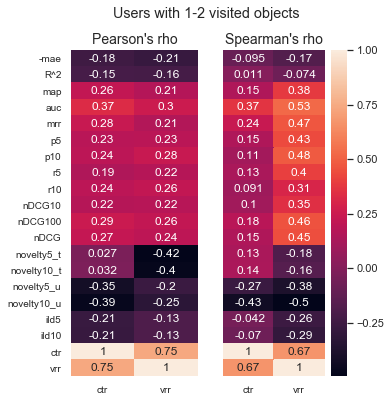

In [374]:
import matplotlib
import matplotlib.pyplot as plt

resultsX = results[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10',
 'ctr',
 'vrr']]


fig, (ax1, ax2) = plt.subplots(1,2,  figsize=(5, 6))

matplotlib.rcParams.update({'font.size': 12, "axes.titlesize":14})
ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

fig.suptitle("Users with 1-2 visited objects")
sns.heatmap(resultsX.corr()[["ctr","vrr"]], annot=True, cbar=False, ax = ax1) #method='spearman'
ax1.set_xticks(np.asarray(range(len(resultsX[["ctr","vrr"]].columns)))+0.5, minor=False)
ax1.set_xticklabels(resultsX[["ctr","vrr"]].columns)

ax1.set_yticks(np.asarray(range(len(resultsX.columns)))+0.5, minor=False)
ax1.set_yticklabels(resultsX.columns)

ax1.set(title="Pearson's rho")

sns.heatmap(resultsX.corr(method='spearman')[["ctr","vrr"]], annot=True,  yticklabels=False, ax = ax2) #method='spearman'
ax2.set_xticks(np.asarray(range(len(resultsX[["ctr","vrr"]].columns)))+0.5, minor=False)
ax2.set_xticklabels(resultsX[["ctr","vrr"]].columns)

ax2.set(title="Spearman's rho")

#ax2.set_yticks(np.asarray(range(len(resultsX.columns)))+0.5, minor=False)
#ax2.set_yticklabels(resultsX.columns)

In [344]:
def calculate_vrr(dfTesting, dfIF):
    merged = pd.merge(dfTesting, dfIF, how='inner', on=("userID", "objectID"))
    merged["dateX"] = pd.to_datetime(merged.date)
    merged["lastModifiedX"] = pd.to_datetime(merged.lastModified)
    merged["dtDiff"] = (merged["lastModifiedX"] - merged["dateX"]).dt.seconds
    mergedRestr = merged.loc[(merged.date < merged.lastModified) & (merged.dtDiff > 5) & (merged.eventType_x == "object_shown_in_list") & (merged.visited_objects > 0) & (merged.eventType_y == "pageview")]
    
    #deviation from original results
    #mergedRestr.sort_values("dtDiff", inplace=True)
    #mergedRestr.drop_duplicates(["userID", "objectID", "lastModified"], inplace=True)
    #mergedRestr.head()
    #end of deviation
    
    mergedRestr["recVariant"] = mergedRestr.userID % 12
    mergedRestr = mergedRestr[["recVariant","date","lastModified"]]
    dfGroup = mergedRestr.groupby(by=["recVariant"])
    dfSum = dfGroup.count()
    return dfSum

In [345]:
dfTesting_1_2 = pd.read_csv("users_with_1-2_objects/validTestingResults.csv", sep=";", header=0, index_col=None)
dfTesting_3_5 = pd.read_csv("users_with_3-5_objects/validTestingResults.csv", sep=";", header=0, index_col=None)
dfTesting_6_15 = pd.read_csv("users_with_6-15_objects/validTestingResults.csv", sep=";", header=0, index_col=None)
dfTesting_16_ = pd.read_csv("users_with_16+_objects/validTestingResults.csv", sep=";", header=0, index_col=None)
dfTesting_ALL = pd.read_csv("allData/validTestingResults.csv", sep=";", header=0, index_col=None)

resSO_1_2 = pd.read_csv("users_with_1-2_objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO_3_5 = pd.read_csv("users_with_3-5_objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO_6_15 = pd.read_csv("users_with_6-15_objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO_16_ = pd.read_csv("users_with_16+_objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO_ALL = pd.read_csv("allData/results_shown_object.csv", sep=";", header=0, index_col=None)


resOO_1_2 = pd.read_csv("users_with_1-2_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO_3_5 = pd.read_csv("users_with_3-5_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO_6_15 = pd.read_csv("users_with_6-15_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO_16_ = pd.read_csv("users_with_16+_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO_ALL = pd.read_csv("allData/results_open_object.csv", sep=";", header=0, index_col=None)


resVO_1_2 = calculate_vrr(dfTesting_1_2, dfIF)
resVO_3_5 = calculate_vrr(dfTesting_3_5, dfIF)
resVO_6_15 = calculate_vrr(dfTesting_6_15, dfIF)
resVO_16_ = calculate_vrr(dfTesting_16_, dfIF)
resVO_ALL = calculate_vrr(dfTesting_ALL, dfIF)

stats = [
    [sum(resOO_1_2.cnt) / sum(resOO_ALL.cnt) , sum(resVO_1_2.date) / sum(resVO_ALL.date), sum(resOO_1_2.cnt) / sum(resSO_1_2.cnt) , sum(resVO_1_2.date) / sum(resSO_1_2.cnt), (sum(resOO_1_2.cnt) / sum(resSO_1_2.cnt)) / (sum(resOO_ALL.cnt) / sum(resSO_ALL.cnt))  , (sum(resVO_1_2.date) / sum(resSO_1_2.cnt)) / (sum(resVO_ALL.date) / sum(resSO_ALL.cnt))],
    [sum(resOO_3_5.cnt) / sum(resOO_ALL.cnt), sum(resVO_3_5.date) / sum(resVO_ALL.date), sum(resOO_3_5.cnt) / sum(resSO_3_5.cnt) , sum(resVO_3_5.date) / sum(resSO_3_5.cnt), (sum(resOO_3_5.cnt) / sum(resSO_3_5.cnt)) / (sum(resOO_ALL.cnt) / sum(resSO_ALL.cnt))  , (sum(resVO_3_5.date) / sum(resSO_3_5.cnt)) / (sum(resVO_ALL.date) / sum(resSO_ALL.cnt))],
    [sum(resOO_6_15.cnt) / sum(resOO_ALL.cnt), sum(resVO_6_15.date) / sum(resVO_ALL.date), sum(resOO_6_15.cnt) / sum(resSO_6_15.cnt) , sum(resVO_6_15.date) / sum(resSO_6_15.cnt), (sum(resOO_6_15.cnt) / sum(resSO_6_15.cnt)) / (sum(resOO_ALL.cnt) / sum(resSO_ALL.cnt))  , (sum(resVO_6_15.date) / sum(resSO_6_15.cnt)) / (sum(resVO_ALL.date) / sum(resSO_ALL.cnt))],
    [sum(resOO_16_.cnt) / sum(resOO_ALL.cnt), sum(resVO_16_.date) / sum(resVO_ALL.date), sum(resOO_16_.cnt) / sum(resSO_16_.cnt) , sum(resVO_16_.date) / sum(resSO_16_.cnt), (sum(resOO_16_.cnt) / sum(resSO_16_.cnt)) / (sum(resOO_ALL.cnt) / sum(resSO_ALL.cnt))  , (sum(resVO_16_.date) / sum(resSO_16_.cnt)) / (sum(resVO_ALL.date) / sum(resSO_ALL.cnt))]
]

stats

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[[0.6056034482758621,
  0.35297874281543656,
  0.008316931318721976,
  0.057256596569635804,
  1.167426498392288,
  0.6804398800982875],
 [0.16918103448275862,
  0.15591643098257457,
  0.006979328739719938,
  0.07597243831962658,
  0.9796706260395031,
  0.9028597562223225],
 [0.1336206896551724,
  0.15463917525773196,
  0.00563329093221879,
  0.07700345266218427,
  0.7907307221139567,
  0.9151123754428231],
 [0.0894396551724138,
  0.3364656509442569,
  0.004655336810813843,
  0.20685400190700545,
  0.6534577891308426,
  2.4582619416484297]]

In [346]:
print(sum(resOO_ALL.cnt), sum(resSO_ALL.cnt),sum(resVO_ALL.date))

928 130261 10961


In [347]:
statsDF = pd.DataFrame(stats)
statsDF.columns = ["Sum clicks","Sum visits", "CTR", "VRR", "relative CTR", "relative VRR"]

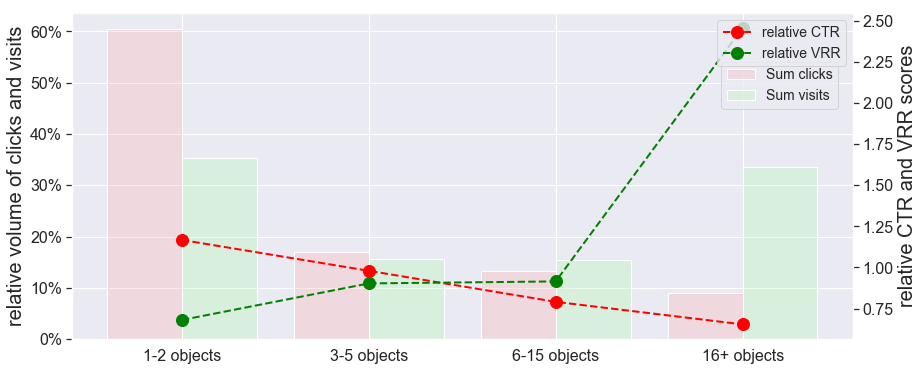

In [390]:
from matplotlib import pyplot
fig, ax1 = plt.subplots(1,1,  figsize=(14, 6))
ax2 = ax1.twinx()

#ax2.plot(statsDF["Sum clicks"], color='grey', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax1.bar(statsDF.index - 0.2, statsDF["Sum clicks"], align='center', width=0.4, color=(0.99, 0.7, 0.7, 0.3), zorder=1)
ax1.bar(statsDF.index + 0.2, statsDF["Sum visits"], align='center', width=0.4, color=(0.7, 0.99, 0.7, 0.3), zorder=2)
#ax2.plot(statsDF["Sum visits"], color='black', marker='o', linestyle='dashed',linewidth=2, markersize=12)

ax2.plot(statsDF["relative CTR"], color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12, zorder=3)
ax2.plot(statsDF["relative VRR"], color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12, zorder=4)
#ax.set_title('LM: predicted vs. real CTR')

ax2.yaxis.grid(False)
ax1.yaxis.grid(True)
ax2.set_ylabel('relative CTR and VRR scores', size=20)
ax1.set_ylabel('relative volume of clicks and visits', size=20)
ax1.set_xticks(range(0,4))#num of features
ax1.set_xticklabels(['1-2 objects', '3-5 objects', '6-15 objects', '16+ objects'])

#plt.legend(Gender,loc=2)
#ax1.legend(loc=2,  prop={'size': 14})
ax1.legend(["Sum clicks", "Sum visits"], bbox_to_anchor=(0.99, 0.87),  prop={'size': 14})
ax2.legend(loc=1,  prop={'size': 14})

matplotlib.rcParams.update({'font.size': 16, "axes.labelsize":20})
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

from matplotlib.ticker import FuncFormatter
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.savefig("relative_ctr_vrr.png",dpi=300)

In [349]:
resOO_1_2["ctr"] = resOO_1_2.cnt / resSO_1_2.cnt
resOO_3_5["ctr"] = resOO_3_5.cnt / resSO_3_5.cnt
resOO_6_15["ctr"] = resOO_6_15.cnt / resSO_6_15.cnt

resOO_1_2["vrr"] = resVO_1_2.date / resSO_1_2.cnt
resOO_3_5["vrr"] = resVO_3_5.date / resSO_3_5.cnt
resOO_6_15["vrr"] = resVO_6_15.date / resSO_6_15.cnt

res1_2 = pd.concat([dfx, resOO_1_2], axis=1)
res3_5 = pd.concat([dfx, resOO_3_5], axis=1)
res6_15 = pd.concat([dfx, resOO_6_15], axis=1)
res1_2["inputSize"] = 1
res3_5["inputSize"] = 3
res6_15["inputSize"] = 6

resultX = pd.concat([res1_2, res3_5, res6_15], ignore_index=True)
resultX.head()


,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10,cnt,ctr,vrr,inputSize
0,doc2vec,"128,1",last,yes,no,-56.500787,-0.292326,0.019512,0.617363,0.030878,...,0.233618,0.233531,1.000000,1.000000,0.785023,0.799611,47,0.007732,0.047541,1
1,doc2vec,"128,1",temporal,no,yes,-76.254187,-0.361817,0.022211,0.678597,0.031335,...,0.219208,0.220975,0.997548,0.996848,0.866049,0.838122,51,0.009145,0.066703,1
2,doc2vec,"32,5",mean,no,no,-114.389802,-0.455116,0.016662,0.554607,0.028117,...,0.211227,0.211395,0.997198,0.997373,0.762579,0.785867,48,0.008481,0.051237,1
3,doc2vec,"32,5",mean,no,yes,-114.389802,-0.455116,0.015012,0.554607,0.025444,...,0.213367,0.214064,0.996848,0.997723,0.905701,0.859131,41,0.006367,0.052493,1
4,doc2vec,"128,5",max,yes,no,-35.840726,-0.213676,0.010498,0.525550,0.012323,...,0.233073,0.228605,0.995447,0.994571,0.682880,0.740691,41,0.007679,0.049635,1


# correlations for individual user profile sizes

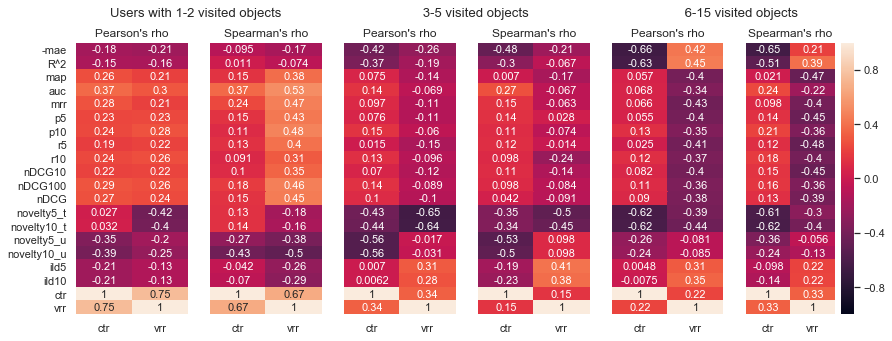

In [388]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,6,  figsize=(14, 5))

ax_i = 0
fig.suptitle("Users with 1-2 visited objects                                       3-5 visited objects                                           6-15 visited objects")
matplotlib.rcParams.update({'font.size': 11, "axes.titlesize":12})
for i in [1,3,6]:
    X = resultX.loc[resultX.inputSize == i]
    results_ = X[['-mae','R^2',
     'map',
     'auc',
     'mrr',
     'p5',
     'p10',
     'r5',
     'r10', 
     'nDCG10',                    
     'nDCG100',
     'nDCG',   
     'novelty5_t',
     'novelty10_t',                    
     'novelty5_u',
     'novelty10_u',
     'ild5',                    
     'ild10',
     'ctr',
     'vrr']]


    ax[ax_i].tick_params(axis='both', which='major', labelsize=11)
    ax[ax_i+1].tick_params(axis='both', which='major', labelsize=11)
    if ax_i == 0:
        sns.heatmap(results_.corr()[["ctr","vrr"]], annot=True, cbar=False, yticklabels=True,  ax = ax[ax_i], vmin=-1, vmax=1)
        ax[ax_i].set_yticks(np.asarray(range(len(results_.columns)))+0.5, minor=False)
        ax[ax_i].set_yticklabels(results_.columns)
    else:
        sns.heatmap(results_.corr()[["ctr","vrr"]], annot=True, cbar=False, yticklabels=False,  ax = ax[ax_i], vmin=-1, vmax=1)

    ax[ax_i].set_xticks(np.asarray(range(len(results_[["ctr","vrr"]].columns)))+0.5, minor=False)
    ax[ax_i].set_xticklabels(results_[["ctr","vrr"]].columns)
    
    
    ax[ax_i].set(title="Pearson's rho")

    if ax_i == 4:
        sns.heatmap(results_.corr(method='spearman')[["ctr","vrr"]], annot=True, cbar=True,  yticklabels=False, ax = ax[ax_i+1], vmin=-1, vmax=1)    
    else:
        sns.heatmap(results_.corr(method='spearman')[["ctr","vrr"]], annot=True, cbar=False,  yticklabels=False, ax = ax[ax_i+1], vmin=-1, vmax=1)    
    

    ax[ax_i+1].set_xticks(np.asarray(range(len(results_[["ctr","vrr"]].columns)))+0.5, minor=False)
    ax[ax_i+1].set_xticklabels(results_[["ctr","vrr"]].columns)
    ax[ax_i+1].set(title="Spearman's rho")
    ax_i += 2
    

#ax2.set_yticks(np.asarray(range(len(resultsX.columns)))+0.5, minor=False)
#ax2.set_yticklabels(resultsX.columns)
plt.savefig("three_correlations.png", dpi=300)

In [365]:
results_.columns

Index(['-mae', 'R^2', 'map', 'auc', 'mrr', 'p5', 'p10', 'r5', 'r10', 'nDCG10',
       'nDCG100', 'nDCG', 'novelty5_t', 'novelty10_t', 'novelty5_u',
       'novelty10_u', 'ild5', 'ild10', 'ctr', 'vrr'],
      dtype='object')

In [367]:
np.asarray(range(len(results_.columns)))+0.5

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5])

In [267]:
resultX.shape

(36, 27)

# Train models for results w.r.t. user input sizes

In [391]:
X = resultX[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10',
 'inputSize']]
y =  resultX["ctr"]

0.26142730054575825
0.002200426364366557
KendalltauResult(correlation=0.4571428571428572, pvalue=8.751944221460826e-05)


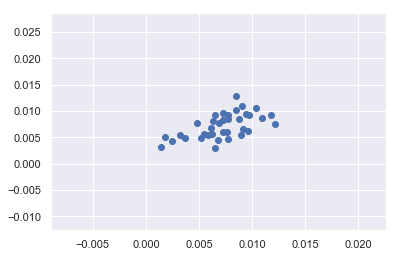

In [392]:
from sklearn.linear_model import LinearRegression
from scipy.stats import kendalltau
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

y_tst = []
y_pred = []
lm_ctr = LinearRegression(fit_intercept=True, normalize=True)
loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lm_ctr.fit(X_train, y_train)
        y_pred.append(lm_ctr.predict(X_test)[0])
        y_tst.append(y_test.values[0])
linear_ctr = lm_ctr
linear_ctr.fit(X, y)
print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)
linear_ctr_res = (y_tst, y_pred)

0.3163440764279908
0.00211703971424011
KendalltauResult(correlation=0.40634920634920635, pvalue=0.0004885647018424363)
[(-0.0, '-mae'), (-2.9823169488331663e-05, 'R^2'), (-0.0, 'map'), (-0.0, 'auc'), (-0.0, 'mrr'), (-0.0, 'p5'), (-0.05861622494180222, 'p10'), (-0.0, 'r5'), (-0.0, 'r10'), (-0.0, 'nDCG10'), (-0.0, 'nDCG100'), (-0.0, 'nDCG'), (-0.08678956916332665, 'novelty5_t'), (-0.0, 'novelty10_t'), (-0.0, 'novelty5_u'), (-0.14271148572787737, 'novelty10_u'), (-0.004245378446864573, 'ild5'), (-0.0, 'ild10'), (-0.0003751591325906426, 'inputSize')]


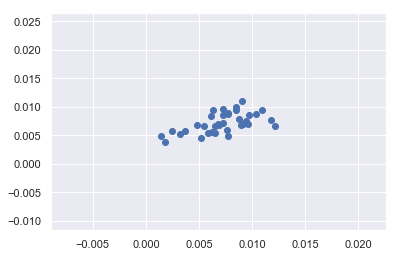

In [396]:
from sklearn.linear_model import LinearRegression
from scipy.stats import kendalltau
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

y_tst = []
y_pred = []
lm_ctr = Lasso(alpha = 0.00001, positive=False, fit_intercept=True, normalize=True)
loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lm_ctr.fit(X_train, y_train)
        y_pred.append(lm_ctr.predict(X_test)[0])
        y_tst.append(y_test.values[0])
lasso_ctr = lm_ctr
lasso_ctr.fit(X, y)
print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)
lasso_ctr_res = (y_tst, y_pred)
print(list(zip(lasso_ctr.coef_, X.columns) ))

0.2058142948596322
0.0022817667510781274
KendalltauResult(correlation=0.4126984126984128, pvalue=0.00039796070647222153)


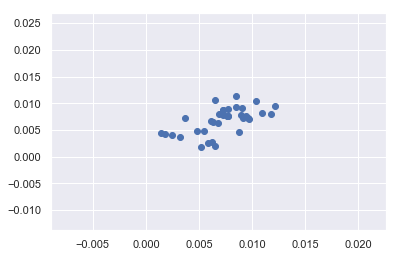

In [305]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import export_graphviz

y_tst = []
y_pred = []
lm_ctr = DecisionTreeRegressor(random_state=0, min_samples_split=6)
loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lm_ctr.fit(X_train, y_train)
        y_pred.append(lm_ctr.predict(X_test)[0])
        y_tst.append(y_test.values[0])

print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)

tree_ctr = lm_ctr
tree_ctr.fit(X, y)
export_graphviz(tree_ctr, "graph.dot", feature_names = X.columns)

tree_ctr_res = (y_tst, y_pred)

In [306]:
X = resultX[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10',
 'inputSize']]
y =  resultX["vrr"]

-0.2635768255715545
0.03019827027744466
KendalltauResult(correlation=0.14603174603174604, pvalue=0.21016121606194482)


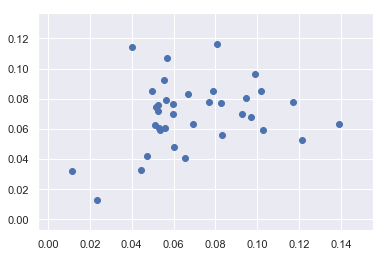

In [307]:
y_tst = []
y_pred = []
lm_ctr = LinearRegression(fit_intercept=True, normalize=True)
loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lm_ctr.fit(X_train, y_train)
        y_pred.append(lm_ctr.predict(X_test)[0])
        y_tst.append(y_test.values[0])
linear_vrr = lm_ctr
linear_vrr.fit(X, y)
print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)
linear_vrr_res = (y_tst, y_pred)

0.02961775765786656
0.026463827799634687
KendalltauResult(correlation=0.19682539682539685, pvalue=0.09122117915901157)


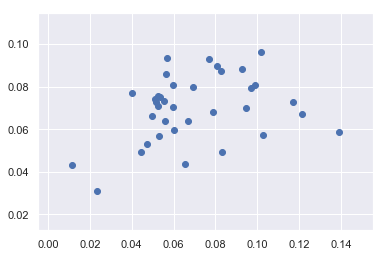

In [308]:
y_tst = []
y_pred = []
lm_ctr = Lasso(alpha = 0.0001, positive=False, fit_intercept=True, normalize=True)
loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lm_ctr.fit(X_train, y_train)
        y_pred.append(lm_ctr.predict(X_test)[0])
        y_tst.append(y_test.values[0])

lasso_vrr = lm_ctr
lasso_vrr.fit(X, y)
print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)
lasso_vrr_res = (y_tst, y_pred)

-0.37400679758011046
0.0314902190987201
KendalltauResult(correlation=0.14160740409583872, pvalue=0.22525520266574772)


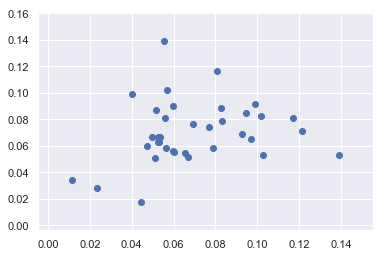

In [309]:
y_tst = []
y_pred = []
lm_ctr = DecisionTreeRegressor(random_state=0, min_samples_split=6)
loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lm_ctr.fit(X_train, y_train)
        y_pred.append(lm_ctr.predict(X_test)[0])
        y_tst.append(y_test.values[0])

print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)
tree_vrr = lm_ctr
tree_vrr.fit(X, y)
export_graphviz(tree_vrr, "graph_vrr.dot", feature_names = X.columns)

tree_vrr_res = (y_tst, y_pred)

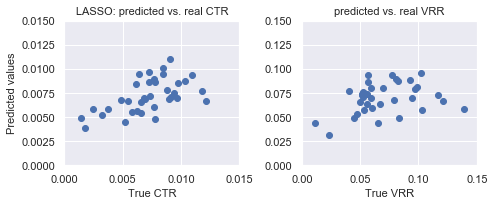

In [424]:
SMALL_SIZE = 11
MEDIUM_SIZE = 11
BIGGER_SIZE = 13

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,3))

ax1.scatter(lasso_ctr_res[0], lasso_ctr_res[1])
ax2.scatter(lasso_vrr_res[0], lasso_vrr_res[1])

ax1.set_title('LASSO: predicted vs. real CTR')
ax2.set_title('predicted vs. real VRR')

ax1.set_xlim( left=0.0, right=0.015)
ax2.set_xlim( left=0.0, right=0.15)
ax1.set_ylim( bottom=0.0, top=0.015)
ax2.set_ylim( bottom=0.0, top=0.15)

ax1.set_xlabel("True CTR")
ax2.set_xlabel("True VRR")
ax1.set_ylabel("Predicted values")


plt.tight_layout()

plt.savefig("predicted_vs_true_ctr.png", dpi=300)

# Get best algorithm variants 

In [311]:
X_all = dfMean[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10'
 ]]
for i in [1,3,6]:
    X_all['inputSize'] = i
    
    y_pred = linear_ctr.predict(X_all)
    dfMean["ctr_pred_linear_is_"+str(i)] = y_pred
    y_pred = linear_vrr.predict(X_all)
    dfMean["vrr_pred_linear_is_"+str(i)] = y_pred        
    
    y_pred = lasso_ctr.predict(X_all)
    dfMean["ctr_pred_lasso_is_"+str(i)] = y_pred
    y_pred = lasso_vrr.predict(X_all)
    dfMean["vrr_pred_lasso_is_"+str(i)] = y_pred
    
    y_pred = tree_ctr.predict(X_all)
    dfMean["ctr_pred_tree_is_"+str(i)] = y_pred
    y_pred = tree_vrr.predict(X_all)
    dfMean["vrr_pred_tree_is_"+str(i)] = y_pred


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [312]:
idxs = dfMean[['ctr_pred_linear_is_1','ctr_pred_linear_is_3','ctr_pred_linear_is_6',
               'ctr_pred_lasso_is_1','ctr_pred_lasso_is_3','ctr_pred_lasso_is_6', 
               'ctr_pred_tree_is_1','ctr_pred_tree_is_3','ctr_pred_tree_is_6', 
               'vrr_pred_linear_is_1','vrr_pred_linear_is_3','vrr_pred_linear_is_6',
               'vrr_pred_lasso_is_1','vrr_pred_lasso_is_3','vrr_pred_lasso_is_6', 
               'vrr_pred_tree_is_1','vrr_pred_tree_is_3','vrr_pred_tree_is_6'
              ]].idxmax(axis=0)
dfMean.loc[idxs.values]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,ctr_pred_lasso_is_3,vrr_pred_lasso_is_3,ctr_pred_tree_is_3,vrr_pred_tree_is_3,ctr_pred_linear_is_6,vrr_pred_linear_is_6,ctr_pred_lasso_is_6,vrr_pred_lasso_is_6,ctr_pred_tree_is_6,vrr_pred_tree_is_6
604,word2vec,"32,3",max,no,no,-81.676729,-0.379390,0.071868,0.810622,0.075038,...,0.010076,0.084629,0.005513,0.087353,1.149961e+07,-1.895141e+08,0.008951,0.095967,0.004257,0.105140
604,word2vec,"32,3",max,no,no,-81.676729,-0.379390,0.071868,0.810622,0.075038,...,0.010076,0.084629,0.005513,0.087353,1.149961e+07,-1.895141e+08,0.008951,0.095967,0.004257,0.105140
604,word2vec,"32,3",max,no,no,-81.676729,-0.379390,0.071868,0.810622,0.075038,...,0.010076,0.084629,0.005513,0.087353,1.149961e+07,-1.895141e+08,0.008951,0.095967,0.004257,0.105140
688,word2vec,"64,1",mean,no,no,-107.587027,-0.448937,0.073294,0.811756,0.091635,...,0.011457,0.086318,0.009631,0.087353,3.498539e+06,-5.765609e+07,0.010332,0.097656,0.008077,0.105140
688,word2vec,"64,1",mean,no,no,-107.587027,-0.448937,0.073294,0.811756,0.091635,...,0.011457,0.086318,0.009631,0.087353,3.498539e+06,-5.765609e+07,0.010332,0.097656,0.008077,0.105140
688,word2vec,"64,1",mean,no,no,-107.587027,-0.448937,0.073294,0.811756,0.091635,...,0.011457,0.086318,0.009631,0.087353,3.498539e+06,-5.765609e+07,0.010332,0.097656,0.008077,0.105140
208,doc2vec,"32,1",mean,no,no,-113.166530,-0.451771,0.035287,0.715057,0.056034,...,0.007685,0.066738,0.010334,0.087353,-1.163290e+06,1.917108e+07,0.006560,0.078076,0.010334,0.105140
208,doc2vec,"32,1",mean,no,no,-113.166530,-0.451771,0.035287,0.715057,0.056034,...,0.007685,0.066738,0.010334,0.087353,-1.163290e+06,1.917108e+07,0.006560,0.078076,0.010334,0.105140
208,doc2vec,"32,1",mean,no,no,-113.166530,-0.451771,0.035287,0.715057,0.056034,...,0.007685,0.066738,0.010334,0.087353,-1.163290e+06,1.917108e+07,0.006560,0.078076,0.010334,0.105140
781,word2vec,"64,5",temporal3,no,yes,-80.666387,-0.381088,0.064052,0.794703,0.083787,...,0.006506,0.077065,0.005513,0.087353,-9.077061e+06,1.495904e+08,0.005380,0.088403,0.004257,0.105140


In [328]:
dfMean.sort_values("ctr_pred_linear_is_1", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_linear_is_1","ctr_pred_lasso_is_1","ctr_pred_tree_is_1"]].head(20)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_linear_is_1,ctr_pred_lasso_is_1,ctr_pred_tree_is_1
604,word2vec,"32,3",max,no,no,1.149961e+07,0.010827,0.007683
768,word2vec,"64,5",mean,no,no,9.455932e+06,0.011679,0.009631
729,word2vec,"64,3",mean,no,yes,9.290112e+06,0.010168,0.009631
534,word2vec,"128,5",temporal,yes,no,9.230308e+06,0.005245,0.007683
613,word2vec,"32,3",temporal,no,yes,9.032663e+06,0.010571,0.009631
772,word2vec,"64,5",temporal,no,no,8.945537e+06,0.011536,0.009631
650,word2vec,"32,5",mean,yes,no,8.787948e+06,0.011535,0.010334
652,word2vec,"32,5",temporal,no,no,8.447458e+06,0.011657,0.010334
648,word2vec,"32,5",mean,no,no,8.419326e+06,0.012106,0.010334
608,word2vec,"32,3",mean,no,no,7.859140e+06,0.011506,0.009631


In [425]:
d = dfMean.sort_values("ctr_pred_lasso_is_1", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_linear_is_1","ctr_pred_lasso_is_1","ctr_pred_tree_is_1"]].head(100)

d.loc[(d.alg=="word2vec")&(d.recAlg == "temporal")]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_linear_is_1,ctr_pred_lasso_is_1,ctr_pred_tree_is_1
692,word2vec,"64,1",temporal,no,no,3.643430e+06,0.011934,0.009631
652,word2vec,"32,5",temporal,no,no,8.447458e+06,0.011657,0.010334
772,word2vec,"64,5",temporal,no,no,8.945537e+06,0.011536,0.009631
612,word2vec,"32,3",temporal,no,no,7.404292e+06,0.011434,0.009631
452,word2vec,"128,1",temporal,no,no,-3.177233e+05,0.011355,0.009631
693,word2vec,"64,1",temporal,no,yes,8.680977e+05,0.011194,0.008103
732,word2vec,"64,3",temporal,no,no,3.785779e+06,0.011148,0.009631
653,word2vec,"32,5",temporal,no,yes,4.516131e+06,0.010905,0.010334
572,word2vec,"32,1",temporal,no,no,2.838663e+06,0.010832,0.010334
492,word2vec,"128,3",temporal,no,no,-1.110285e+06,0.010650,0.007683


In [397]:
dfMean.sort_values("ctr_pred_tree_is_1", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_linear_is_1","ctr_pred_lasso_is_1","ctr_pred_tree_is_1"]].head(50)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_linear_is_1,ctr_pred_lasso_is_1,ctr_pred_tree_is_1
226,doc2vec,"32,1",temporal5,yes,no,-4.220831e+06,0.004549,0.010334
290,doc2vec,"32,5",mean,yes,no,-3.567541e+06,0.008214,0.010334
292,doc2vec,"32,5",temporal,no,no,-8.342398e+04,0.009705,0.010334
304,doc2vec,"32,5",temporal5,no,no,-1.501253e+06,0.009361,0.010334
250,doc2vec,"32,3",mean,yes,no,-3.054787e+06,0.007530,0.010334
252,doc2vec,"32,3",temporal,no,no,-9.330944e+05,0.009063,0.010334
568,word2vec,"32,1",mean,no,no,4.538948e+06,0.010854,0.010334
569,word2vec,"32,1",mean,no,yes,5.509120e+06,0.010635,0.010334
296,doc2vec,"32,5",temporal10,no,no,-3.263073e+05,0.009524,0.010334
570,word2vec,"32,1",mean,yes,no,1.525234e+06,0.010494,0.010334


In [330]:
dfMean.sort_values("ctr_pred_linear_is_3", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_linear_is_3","ctr_pred_lasso_is_3","ctr_pred_tree_is_3"]].head(20)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_linear_is_3,ctr_pred_lasso_is_3,ctr_pred_tree_is_3
604,word2vec,"32,3",max,no,no,1.149961e+07,0.010076,0.005513
768,word2vec,"64,5",mean,no,no,9.455932e+06,0.010929,0.009631
729,word2vec,"64,3",mean,no,yes,9.290112e+06,0.009418,0.009631
534,word2vec,"128,5",temporal,yes,no,9.230308e+06,0.004495,0.002706
613,word2vec,"32,3",temporal,no,yes,9.032663e+06,0.009820,0.009631
772,word2vec,"64,5",temporal,no,no,8.945537e+06,0.010786,0.009631
650,word2vec,"32,5",mean,yes,no,8.787948e+06,0.010784,0.010334
652,word2vec,"32,5",temporal,no,no,8.447458e+06,0.010906,0.010334
648,word2vec,"32,5",mean,no,no,8.419326e+06,0.011356,0.010334
608,word2vec,"32,3",mean,no,no,7.859140e+06,0.010756,0.009631


In [331]:
dfMean.sort_values("ctr_pred_lasso_is_3", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_linear_is_3","ctr_pred_lasso_is_3","ctr_pred_tree_is_3"]].head(20)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_linear_is_3,ctr_pred_lasso_is_3,ctr_pred_tree_is_3
688,word2vec,"64,1",mean,no,no,3.498539e+06,0.011457,0.009631
648,word2vec,"32,5",mean,no,no,8.419326e+06,0.011356,0.010334
692,word2vec,"64,1",temporal,no,no,3.643430e+06,0.011184,0.009631
768,word2vec,"64,5",mean,no,no,9.455932e+06,0.010929,0.009631
652,word2vec,"32,5",temporal,no,no,8.447458e+06,0.010906,0.010334
772,word2vec,"64,5",temporal,no,no,8.945537e+06,0.010786,0.009631
650,word2vec,"32,5",mean,yes,no,8.787948e+06,0.010784,0.010334
608,word2vec,"32,3",mean,no,no,7.859140e+06,0.010756,0.009631
690,word2vec,"64,1",mean,yes,no,5.030861e+06,0.010746,0.009631
612,word2vec,"32,3",temporal,no,no,7.404292e+06,0.010684,0.009631


In [398]:
dfMean.sort_values("ctr_pred_tree_is_3", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_linear_is_3","ctr_pred_lasso_is_3","ctr_pred_tree_is_3"]].head(50)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_linear_is_3,ctr_pred_lasso_is_3,ctr_pred_tree_is_3
226,doc2vec,"32,1",temporal5,yes,no,-4.220831e+06,0.003799,0.010334
208,doc2vec,"32,1",mean,no,no,-1.163290e+06,0.007685,0.010334
651,word2vec,"32,5",mean,yes,yes,7.303045e+06,0.009503,0.010334
568,word2vec,"32,1",mean,no,no,4.538948e+06,0.010104,0.010334
649,word2vec,"32,5",mean,no,yes,6.839056e+06,0.010190,0.010334
569,word2vec,"32,1",mean,no,yes,5.509120e+06,0.009885,0.010334
570,word2vec,"32,1",mean,yes,no,1.525234e+06,0.009744,0.010334
571,word2vec,"32,1",mean,yes,yes,3.731324e+06,0.008925,0.010334
256,doc2vec,"32,3",temporal10,no,no,-1.440317e+06,0.008118,0.010334
572,word2vec,"32,1",temporal,no,no,2.838663e+06,0.010081,0.010334


In [333]:
dfMean.sort_values("ctr_pred_linear_is_6", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_linear_is_6","ctr_pred_lasso_is_6","ctr_pred_tree_is_6"]].head(20)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_linear_is_6,ctr_pred_lasso_is_6,ctr_pred_tree_is_6
604,word2vec,"32,3",max,no,no,1.149961e+07,0.008951,0.004257
768,word2vec,"64,5",mean,no,no,9.455932e+06,0.009803,0.008077
729,word2vec,"64,3",mean,no,yes,9.290112e+06,0.008293,0.008077
534,word2vec,"128,5",temporal,yes,no,9.230308e+06,0.003370,0.002706
613,word2vec,"32,3",temporal,no,yes,9.032663e+06,0.008695,0.008077
772,word2vec,"64,5",temporal,no,no,8.945537e+06,0.009660,0.008077
650,word2vec,"32,5",mean,yes,no,8.787948e+06,0.009659,0.010334
652,word2vec,"32,5",temporal,no,no,8.447458e+06,0.009781,0.010334
648,word2vec,"32,5",mean,no,no,8.419326e+06,0.010230,0.010334
608,word2vec,"32,3",mean,no,no,7.859140e+06,0.009631,0.008077


In [334]:
dfMean.sort_values("ctr_pred_lasso_is_6", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_linear_is_6","ctr_pred_lasso_is_6","ctr_pred_tree_is_6"]].head(20)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_linear_is_6,ctr_pred_lasso_is_6,ctr_pred_tree_is_6
688,word2vec,"64,1",mean,no,no,3.498539e+06,0.010332,0.008077
648,word2vec,"32,5",mean,no,no,8.419326e+06,0.010230,0.010334
692,word2vec,"64,1",temporal,no,no,3.643430e+06,0.010058,0.008077
768,word2vec,"64,5",mean,no,no,9.455932e+06,0.009803,0.008077
652,word2vec,"32,5",temporal,no,no,8.447458e+06,0.009781,0.010334
772,word2vec,"64,5",temporal,no,no,8.945537e+06,0.009660,0.008077
650,word2vec,"32,5",mean,yes,no,8.787948e+06,0.009659,0.010334
608,word2vec,"32,3",mean,no,no,7.859140e+06,0.009631,0.008077
690,word2vec,"64,1",mean,yes,no,5.030861e+06,0.009620,0.008077
612,word2vec,"32,3",temporal,no,no,7.404292e+06,0.009559,0.008077


In [399]:
dfMean.sort_values("ctr_pred_tree_is_6", ascending=False)[["alg","params","recAlg","noveltyEnhance","diversityEnhance","ctr_pred_linear_is_6","ctr_pred_lasso_is_6","ctr_pred_tree_is_6"]].head(50)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,ctr_pred_linear_is_6,ctr_pred_lasso_is_6,ctr_pred_tree_is_6
226,doc2vec,"32,1",temporal5,yes,no,-4.220831e+06,0.002673,0.010334
650,word2vec,"32,5",mean,yes,no,8.787948e+06,0.009659,0.010334
571,word2vec,"32,1",mean,yes,yes,3.731324e+06,0.007800,0.010334
572,word2vec,"32,1",temporal,no,no,2.838663e+06,0.008956,0.010334
573,word2vec,"32,1",temporal,no,yes,3.942968e+06,0.008711,0.010334
210,doc2vec,"32,1",mean,yes,no,-2.327924e+06,0.005260,0.010334
209,doc2vec,"32,1",mean,no,yes,4.051154e+05,0.006022,0.010334
208,doc2vec,"32,1",mean,no,no,-1.163290e+06,0.006560,0.010334
304,doc2vec,"32,5",temporal5,no,no,-1.501253e+06,0.007485,0.010334
296,doc2vec,"32,5",temporal10,no,no,-3.263073e+05,0.007648,0.010334


# Train models for user input sizes separately

-3.1330433232463957
0.005205293155327898
KendalltauResult(correlation=0.19365079365079368, pvalue=0.09656309500112713)


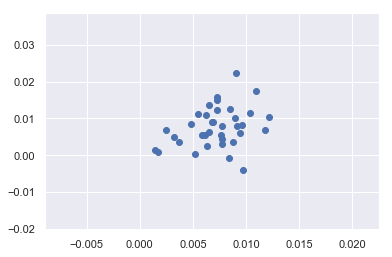

In [166]:
from sklearn.linear_model import LinearRegression
from scipy.stats import kendalltau
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
lm_ctr = {}
y_tst = []
y_pred = []
for i in [1,3,6]:
    Xi = X.loc[X.inputSize == i]
    yi = y.loc[X.inputSize == i]
              
    lm_ctr[i] = LinearRegression(fit_intercept=True, normalize=True)
    loocv = LeaveOneOut()
    loocv.get_n_splits(Xi)

    for train_index, test_index in loocv.split(Xi):
        X_train, X_test = Xi.iloc[train_index], Xi.iloc[test_index]
        y_train, y_test = yi.iloc[train_index], yi.iloc[test_index]
        lm_ctr[i].fit(X_train, y_train)
        y_pred.append(lm_ctr[i].predict(X_test)[0])
        y_tst.append(y_test.values[0])

print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)

[(-0.0, '-mae'), (-0.0, 'R^2'), (0.0, 'map'), (0.0007910330239378379, 'auc'), (0.0, 'mrr'), (0.0, 'p5'), (0.0, 'p10'), (0.0, 'r5'), (0.0, 'r10'), (0.0, 'nDCG10'), (0.0, 'nDCG100'), (0.0, 'nDCG'), (-0.0, 'novelty5_t'), (0.0, 'novelty10_t'), (-0.0, 'novelty5_u'), (-0.02150783658262379, 'novelty10_u'), (-0.0, 'ild5'), (-0.0, 'ild10'), (0.0, 'inputSize')]
[(-0.0, '-mae'), (-1.1440204175731507e-05, 'R^2'), (-0.0, 'map'), (-0.0, 'auc'), (-0.0, 'mrr'), (-0.0, 'p5'), (-0.0, 'p10'), (-0.0, 'r5'), (-0.0, 'r10'), (-0.0, 'nDCG10'), (-0.0, 'nDCG100'), (-0.0, 'nDCG'), (-0.0, 'novelty5_t'), (-0.06171022985821645, 'novelty10_t'), (-0.0, 'novelty5_u'), (-0.1241121529451737, 'novelty10_u'), (-0.0, 'ild5'), (-0.0, 'ild10'), (0.0, 'inputSize')]
[(-0.0, '-mae'), (-6.233453090242194e-05, 'R^2'), (-0.0, 'map'), (-0.0, 'auc'), (-0.0, 'mrr'), (-0.0, 'p5'), (0.0, 'p10'), (-0.0, 'r5'), (0.0, 'r10'), (0.0, 'nDCG10'), (0.0, 'nDCG100'), (0.0, 'nDCG'), (-0.0, 'novelty5_t'), (-0.11694718203501711, 'novelty10_t'), (-0

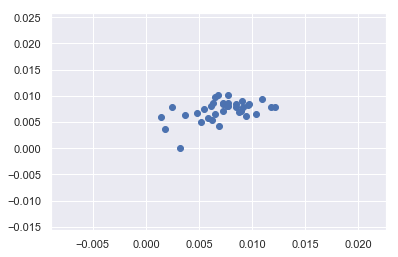

In [167]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

lasso_ctr = {}
y_tst = []
y_pred = []
for i in [1,3,6]:
    Xi = X.loc[X.inputSize == i]
    yi = y.loc[X.inputSize == i]
    lasso_ctr[i] = Lasso(alpha = 0.0001, positive=False, fit_intercept=True, normalize=True)
    loocv = LeaveOneOut()
    loocv.get_n_splits(Xi)

    for train_index, test_index in loocv.split(Xi):
        X_train, X_test = Xi.iloc[train_index], Xi.iloc[test_index]
        y_train, y_test = yi.iloc[train_index], yi.iloc[test_index]
        lasso_ctr[i].fit(X_train, y_train)
        y_pred.append(lasso_ctr[i].predict(X_test)[0])
        y_tst.append(y_test.values[0])
        
    lasso_ctr[i].fit(Xi, yi)
    print(list(zip(lasso_ctr[i].coef_, X.columns) ))
    
print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))


plt.scatter(y_tst, y_pred)



0.2058142948596322
0.0022817667510781274
KendalltauResult(correlation=0.4126984126984128, pvalue=0.00039796070647222153)
[0.0076714319959756425, 0.007318140330853843, 0.011260786565305658, 0.006501720299534507, 0.007684480518825855, 0.001936308803261593, 0.00789525975304231, 0.008808781063466315, 0.009135816456877171, 0.007125574928568472, 0.007777164223095349, 0.009257245264661634, 0.0018777269956016254, 0.0048910359396025305, 0.010326425007609746, 0.006599024727221499, 0.0028121109664023653, 0.003991847556048052, 0.00759898024495696, 0.008799622990839938, 0.008159641282601994, 0.004657902196763515, 0.004768585287456391, 0.008995854486042136, 0.00425661967010697, 0.002535361231651835, 0.009414926928720646, 0.006270143933859832, 0.0037647254786366807, 0.004497541194788901, 0.010623482291230347, 0.007756550337091203, 0.007684955397461602, 0.00796479552056348, 0.007255800916935065, 0.007300494129606946]


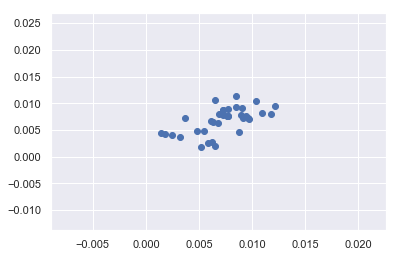

In [168]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import export_graphviz

regressor = DecisionTreeRegressor(random_state=0, min_samples_split=6)
loocv = LeaveOneOut()
loocv.get_n_splits(X)
y_tst = []
y_pred = []
for train_index, test_index in loocv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regressor.fit(X_train, y_train)
    y_pred.append(regressor.predict(X_test)[0])
    y_tst.append(y_test.values[0])
    #print(regressor.decision_path(X_test),)

print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
print(y_pred)

regressor.fit(X, y)
export_graphviz(regressor, "graph.dot", feature_names = X.columns)
plt.scatter(y_tst, y_pred)

## Best w.r.t. CTR

In [179]:
X_all = dfMean[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10'
 ]]
for i in [1,3,6]:
    X_all['inputSize'] = i
    y_pred = lasso_ctr[i].predict(X_all)
    dfMean["ctr_pred_lasso_is_"+str(i)] = y_pred
    
    y_pred = regressor.predict(X_all)
    dfMean["ctr_pred_tree_is_"+str(i)] = y_pred


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [180]:
dfMean.head(20)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,ctr_pred_lasso_is_3,ctr_pred_tree_is_3,ctr_pred_lasso_is_6,ctr_pred_tree_is_6,vrr_pred_lasso_is_1,vrr_pred_tree_is_1,vrr_pred_lasso_is_3,vrr_pred_tree_is_3,vrr_pred_lasso_is_6,vrr_pred_tree_is_6
0,attributeCosineSim,noSameObjects,last,no,no,-91.822720,-0.374933,0.098746,0.736751,0.134829,...,0.006864,0.019606,0.007286,0.010035,0.021038,0.021978,0.018929,0.019606,0.014876,0.010035
1,attributeCosineSim,noSameObjects,last,no,yes,-91.822720,-0.374933,0.100078,0.736751,0.135444,...,0.006836,0.019606,0.007233,0.018991,0.021038,0.021978,0.018929,0.019606,0.014876,0.018991
2,attributeCosineSim,noSameObjects,last,yes,no,-91.857046,-0.375671,0.095557,0.738166,0.131909,...,0.006413,0.019606,0.006543,0.010035,0.021038,0.021978,0.018929,0.019606,0.014876,0.010035
3,attributeCosineSim,noSameObjects,last,yes,yes,-91.857046,-0.375671,0.097457,0.738166,0.133143,...,0.006456,0.019606,0.006515,0.010035,0.021038,0.021978,0.018929,0.019606,0.014876,0.010035
4,attributeCosineSim,noSameObjects,max,no,no,-108.736169,-0.422967,0.102429,0.795054,0.139913,...,0.007544,0.024936,0.008041,0.010035,0.021038,0.024936,0.018929,0.024936,0.014876,0.010035
5,attributeCosineSim,noSameObjects,max,no,yes,-108.736169,-0.422967,0.103549,0.795054,0.148812,...,0.007657,0.022352,0.008293,0.018991,0.021038,0.022352,0.018929,0.022352,0.014876,0.018991
6,attributeCosineSim,noSameObjects,max,yes,no,-107.429977,-0.420515,0.103695,0.796443,0.142654,...,0.006617,0.024936,0.006565,0.010035,0.021038,0.024936,0.018929,0.024936,0.014876,0.010035
7,attributeCosineSim,noSameObjects,max,yes,yes,-107.429977,-0.420515,0.106081,0.796443,0.147915,...,0.006928,0.022352,0.007005,0.018991,0.021038,0.022352,0.018929,0.022352,0.014876,0.018991
8,attributeCosineSim,noSameObjects,mean,no,no,-104.240249,-0.407506,0.124866,0.795487,0.176388,...,0.007285,0.022352,0.007848,0.018991,0.021038,0.022352,0.018929,0.022352,0.014876,0.018991
9,attributeCosineSim,noSameObjects,mean,no,yes,-104.240249,-0.407506,0.126444,0.795487,0.184629,...,0.007412,0.022352,0.007830,0.018991,0.021038,0.022352,0.018929,0.022352,0.014876,0.018991


In [181]:
X = resultX[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10',
 'inputSize']]
y =  resultX["vrr"]

-11.432799553062464
0.017052726908880718
KendalltauResult(correlation=0.009523809523809525, pvalue=0.9348651076368806)


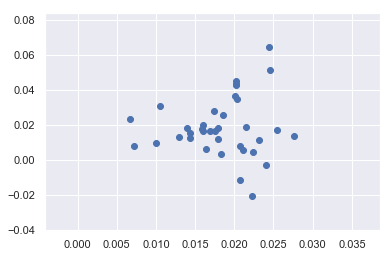

In [182]:
from sklearn.linear_model import LinearRegression
from scipy.stats import kendalltau
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
lm_vrr = {}
y_tst = []
y_pred = []
for i in [1,3,6]:
    Xi = X.loc[X.inputSize == i]
    yi = y.loc[X.inputSize == i]
              
    lm_vrr[i] = LinearRegression(fit_intercept=True, normalize=True)
    loocv = LeaveOneOut()
    loocv.get_n_splits(Xi)

    for train_index, test_index in loocv.split(Xi):
        X_train, X_test = Xi.iloc[train_index], Xi.iloc[test_index]
        y_train, y_test = yi.iloc[train_index], yi.iloc[test_index]
        lm_vrr[i].fit(X_train, y_train)
        y_pred.append(lm_vrr[i].predict(X_test)[0])
        y_tst.append(y_test.values[0])

print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
plt.scatter(y_tst, y_pred)

[(0.0, '-mae'), (8.126288298730097e-06, 'R^2'), (0.0, 'map'), (0.002272079810949255, 'auc'), (0.0, 'mrr'), (-0.0, 'p5'), (-0.0, 'p10'), (-0.0, 'r5'), (-0.0, 'r10'), (-0.0, 'nDCG10'), (0.0, 'nDCG100'), (0.0, 'nDCG'), (-0.13196293812149673, 'novelty5_t'), (-0.0, 'novelty10_t'), (-0.0, 'novelty5_u'), (-0.14771452044822309, 'novelty10_u'), (-0.0, 'ild5'), (-0.0, 'ild10'), (0.0, 'inputSize')]
[(0.0, '-mae'), (2.3322994734577713e-05, 'R^2'), (0.0, 'map'), (0.006728692662337141, 'auc'), (0.0, 'mrr'), (0.0, 'p5'), (0.0, 'p10'), (0.0, 'r5'), (0.0, 'r10'), (0.0, 'nDCG10'), (0.0, 'nDCG100'), (0.0, 'nDCG'), (-0.17171733975833156, 'novelty5_t'), (-0.0, 'novelty10_t'), (-0.0, 'novelty5_u'), (-0.18172945368555066, 'novelty10_u'), (-0.0, 'ild5'), (-0.0, 'ild10'), (0.0, 'inputSize')]
[(-0.0006892300227989048, '-mae'), (-0.0, 'R^2'), (-0.0, 'map'), (0.0, 'auc'), (-0.0, 'mrr'), (-0.0, 'p5'), (0.0, 'p10'), (0.0, 'r5'), (0.0, 'r10'), (0.0, 'nDCG10'), (0.0, 'nDCG100'), (0.0, 'nDCG'), (-0.13350680048951788, 

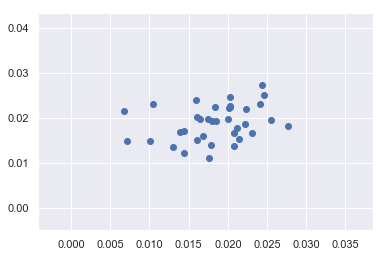

In [183]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

lasso_vrr = {}
y_tst = []
y_pred = []
for i in [1,3,6]:
    Xi = X.loc[X.inputSize == i]
    yi = y.loc[X.inputSize == i]
    lasso_vrr[i] = Lasso(alpha = 0.0001, positive=False, fit_intercept=True, normalize=True)
    loocv = LeaveOneOut()
    loocv.get_n_splits(Xi)

    for train_index, test_index in loocv.split(Xi):
        X_train, X_test = Xi.iloc[train_index], Xi.iloc[test_index]
        y_train, y_test = yi.iloc[train_index], yi.iloc[test_index]
        lasso_vrr[i].fit(X_train, y_train)
        y_pred.append(lasso_vrr[i].predict(X_test)[0])
        y_tst.append(y_test.values[0])
        
    lasso_vrr[i].fit(Xi, yi)
    print(list(zip(lasso_vrr[i].coef_, X.columns) ))
    
print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))


plt.scatter(y_tst, y_pred)



0.3617798744791567
0.003863621896546582
KendalltauResult(correlation=0.5087446810934693, pvalue=1.3036292686652548e-05)
[0.02197840609607909, 0.019936286789248952, 0.017417052220797032, 0.025461717769410076, 0.016952411730927132, 0.006934291269055218, 0.023705519015043502, 0.020912271656699875, 0.025120731156220818, 0.025354179292672807, 0.020894419229860527, 0.02178787294174551, 0.016665277507280144, 0.021245358044787978, 0.020216618731188647, 0.018099812911367922, 0.019606086395859108, 0.010484927916120577, 0.027635782747603834, 0.020936096955016935, 0.025051087790811163, 0.02288480771210726, 0.01978806383822074, 0.02475778971981541, 0.011489943916365916, 0.01569761203819744, 0.015414261086247223, 0.016250817849309786, 0.014152755436985888, 0.008600217315813646, 0.018990638476320987, 0.01953278967040435, 0.010034904013961605, 0.019693908784817873, 0.011489943916365916, 0.010034904013961605]


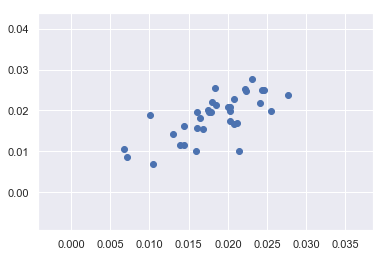

In [184]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import export_graphviz

regressor = DecisionTreeRegressor(random_state=0, min_samples_split=6)
loocv = LeaveOneOut()
loocv.get_n_splits(X)
y_tst = []
y_pred = []
for train_index, test_index in loocv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regressor.fit(X_train, y_train)
    y_pred.append(regressor.predict(X_test)[0])
    y_tst.append(y_test.values[0])
    #print(regressor.decision_path(X_test),)

print(r2_score(y_tst, y_pred))
print(np.sqrt(mean_squared_error(y_tst, y_pred)))
print(kendalltau(y_tst, y_pred))
print(y_pred)

regressor.fit(X, y)
export_graphviz(regressor, "graph_vrr.dot", feature_names = X.columns)
plt.scatter(y_tst, y_pred)

## Prediction based on VRR

In [185]:
X_all = dfMean[['-mae','R^2',
 'map',
 'auc',
 'mrr',
 'p5',
 'p10',
 'r5',
 'r10', 
 'nDCG10',                    
 'nDCG100',
 'nDCG',   
 'novelty5_t',
 'novelty10_t',                    
 'novelty5_u',
 'novelty10_u',
 'ild5',                    
 'ild10'
 ]]
for i in [1,3,6]:    
    X_all['inputSize'] = i
    y_pred = lasso_vrr[i].predict(X_all)
    dfMean["vrr_pred_lasso_is_"+str(i)] = y_pred
    
    y_pred = regressor.predict(X_all)
    dfMean["vrr_pred_tree_is_"+str(i)] = y_pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [186]:
dfMean.head()

,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,ctr_pred_lasso_is_3,ctr_pred_tree_is_3,ctr_pred_lasso_is_6,ctr_pred_tree_is_6,vrr_pred_lasso_is_1,vrr_pred_tree_is_1,vrr_pred_lasso_is_3,vrr_pred_tree_is_3,vrr_pred_lasso_is_6,vrr_pred_tree_is_6
0,attributeCosineSim,noSameObjects,last,no,no,-91.822720,-0.374933,0.098746,0.736751,0.134829,...,0.006864,0.019606,0.007286,0.010035,0.021429,0.021978,0.019558,0.019606,0.015462,0.010035
1,attributeCosineSim,noSameObjects,last,no,yes,-91.822720,-0.374933,0.100078,0.736751,0.135444,...,0.006836,0.019606,0.007233,0.018991,0.021343,0.021978,0.019447,0.019606,0.015375,0.018991
2,attributeCosineSim,noSameObjects,last,yes,no,-91.857046,-0.375671,0.095557,0.738166,0.131909,...,0.006413,0.019606,0.006543,0.010035,0.020331,0.021978,0.018141,0.019606,0.014369,0.010035
3,attributeCosineSim,noSameObjects,last,yes,yes,-91.857046,-0.375671,0.097457,0.738166,0.133143,...,0.006456,0.019606,0.006515,0.010035,0.020293,0.021978,0.018085,0.019606,0.014310,0.010035
4,attributeCosineSim,noSameObjects,max,no,no,-108.736169,-0.422967,0.102429,0.795054,0.139913,...,0.007544,0.024936,0.008041,0.010035,0.021627,0.024936,0.019759,0.024936,0.015485,0.010035


## Get best algorithms for VRR, CTR and input size

In [187]:
idxs = dfMean[['ctr_pred_lasso_is_1','ctr_pred_lasso_is_3','ctr_pred_lasso_is_6', 'vrr_pred_lasso_is_1',
        'vrr_pred_lasso_is_3','vrr_pred_lasso_is_6']].idxmax(axis=0)
dfMean.loc[idxs.values]

,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,ctr_pred_lasso_is_3,ctr_pred_tree_is_3,ctr_pred_lasso_is_6,ctr_pred_tree_is_6,vrr_pred_lasso_is_1,vrr_pred_tree_is_1,vrr_pred_lasso_is_3,vrr_pred_tree_is_3,vrr_pred_lasso_is_6,vrr_pred_tree_is_6
770,word2vec,"64,5",mean,yes,no,-89.924888,-0.409537,0.080281,0.811940,0.112789,...,0.010117,0.022352,0.007169,0.018991,0.024965,0.022352,0.024159,0.022352,0.017781,0.018991
648,word2vec,"32,5",mean,no,no,-111.579366,-0.459278,0.092896,0.818325,0.120330,...,0.010582,0.022352,0.009451,0.018991,0.025681,0.022352,0.024865,0.022352,0.018795,0.018991
648,word2vec,"32,5",mean,no,no,-111.579366,-0.459278,0.092896,0.818325,0.120330,...,0.010582,0.022352,0.009451,0.018991,0.025681,0.022352,0.024865,0.022352,0.018795,0.018991
768,word2vec,"64,5",mean,no,no,-91.185673,-0.413579,0.081689,0.809344,0.113680,...,0.010577,0.022352,0.008093,0.018991,0.025915,0.022352,0.025369,0.022352,0.018761,0.018991
768,word2vec,"64,5",mean,no,no,-91.185673,-0.413579,0.081689,0.809344,0.113680,...,0.010577,0.022352,0.008093,0.018991,0.025915,0.022352,0.025369,0.022352,0.018761,0.018991
648,word2vec,"32,5",mean,no,no,-111.579366,-0.459278,0.092896,0.818325,0.120330,...,0.010582,0.022352,0.009451,0.018991,0.025681,0.022352,0.024865,0.022352,0.018795,0.018991


In [178]:
dfMean.columns

Index(['alg', 'params', 'recAlg', 'noveltyEnhance', 'diversityEnhance', 'R^2',
       '-mae', 'map', 'auc', 'mrr', 'p5', 'p10', 'r5', 'r10', 'nDCG10',
       'nDCG100', 'nDCG', 'novelty5_t', 'novelty10_t', 'novelty5_u',
       'novelty10_u', 'ild5', 'ild10', 'ctr_pred_lasso_is_1',
       'ctr_pred_tree_is_1', 'ctr_pred_lasso_is_3', 'ctr_pred_tree_is_3',
       'ctr_pred_lasso_is_6', 'ctr_pred_tree_is_6', 'vrr_pred_lasso_is_1',
       'vrr_pred_tree_is_1', 'vrr_pred_lasso_is_3', 'vrr_pred_tree_is_3',
       'vrr_pred_lasso_is_6', 'vrr_pred_tree_is_6'],
      dtype='object')